### Default Imports

In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('white')

### Loading data with npy file

In [2]:
volt = np.load('./exampledata.npy') # voltage series

### Generate time axis

In [11]:
rate = 1000. # sampling rate
time = np.arange(0,len(volt)/rate, 1/rate) #time series

### 1. Plot the time series

(9, 10.5)

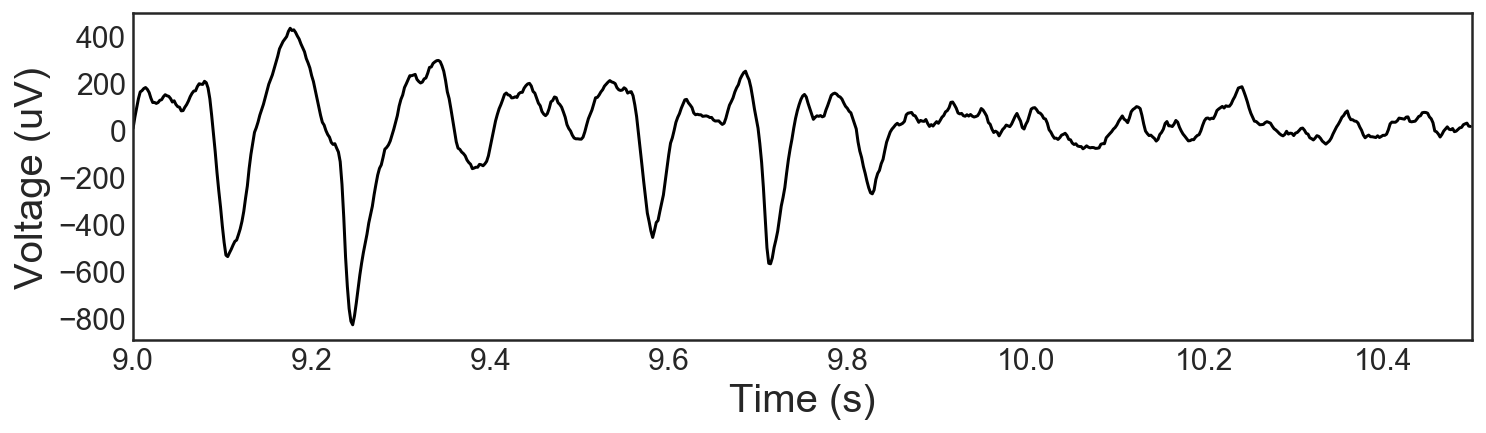

In [10]:
time_plot = [9, 10.5] # time range you want to plot
time_plot_idx = np.where(np.logical_and(time>=time_plot[0], time < time_plot[1]))[0]
plt.figure(figsize=(12,3))
plt.plot(time[time_plot_idx], volt[time_plot_idx],'k')
plt.yticks(size=15)
plt.xticks(size=15)
plt.xlabel('Time (s)',size=20)
plt.ylabel('Voltage (uV)',size=20)
plt.xlim((time_plot))

### Sampling & Aliasing

If you look at line 11, you can see that we have a variable name "rate" which reflects the sampling rate we want to plot on our time series. What does this mean you might ask? Jack Schaedler at https://jackschaedler.github.io/circles-sines-signals/aliasing.html does an excellent job of explaining this under "Sampling & Aliasing".

To re-iterate his example,

"Imagine someone asks you what the altitude of the plane was at 65 minutes into the flight. How should you respond? You don’t actually have a sample for the altitude at 65 minutes, but you do have measurements for the altitude at 60 minutes and 70 minutes. You might feel tempted to draw a line between these two samples, perform some simple linear interpolation, and infer that the altitude was about 31,000 feet. This sort of temptation is completely natural, but really unhealthy when working with discrete signals. The most appropriate response is simply to say, “I don’t know”. Anything else would be a fib. 

Given our measurements and context, we cannot confidently report an altitude for 65 minutes into the flight. Our discrete signal tells us nothing about the altitude of the plane at 65 minutes into the flight. Think about it like this: our discrete signal can actually represent many potential flight histories, most of which have different altitudes at 65 minutes into the flight. In actuality, there are an infinite number of possible flight histories which intersect with the samples of our discrete signal but assume decidedly different altitudes at the 65 minute mark. Click the Play button to see four examples.(I've cut to the final graph of all 4 examples) I hope you’ll notice that connecting the dots in a naive way can be extremely misleading. "


![image1.png](img/image1.png)

"We would call the red, blue, green, and orange curves aliases of one another since they are indistinguishable from one another when sampled with a period of 10 minutes per sample. In other words, the red, green, blue, and orange signals all look exactly the same after being sampled every ten minutes. 

Whenever there is a gap between samples, uncertainty can creep into our measurements. As the gaps get larger, we become less confident that our discrete signal faithfully represents the physical phenomenon that it was meant to measure. Rapid fluctuations and movements which occur between samples will be lost. We can improve the fidelity of our discrete signals by shortening the gap between samples - by reducing the sampling period.

Imagine that instead of sampling every ten minutes, we had decided to sample the plane’s altitude every 5 minutes. This simple choice would allow us to rule out the orange, green, and red curves as possible aliases of our true signal based upon the sample at 65 minutes. It would be clear that the blue curve is the only possible candidate which still intersects with our samples.

Unfortunately, there is a cost associated with sampling. Each sample must be stored somewhere, and space (e.g. memory) is not free. We cannot reduce our sampling period without incurring some overhead. The fundamental trick to sampling is understanding precisely how often you must sample in order to avoid information loss. When we sample more often than is necessary, we say that we are oversampling. Generally, oversampling implies that memory or computational resources are being wasted.2 When we sample too infrequently and lose information we say that we are undersampling. "

-----------------------------------------------------------------------------------------------------------------------------
If you would like further information on how to choose a good sampling rate, take a look at Schaedler's interactive site https://jackschaedler.github.io/circles-sines-signals/sampling.html under "The Sampling Theorem"

### Ground vs. Referencing

An EEG (electroencephalogram)is the potential difference between an active electrode and a reference electrode.
The ground electrode is used to reduce artifacts (electrical circuit, mouvement...) 

(https://www.researchgate.net/post/What_is_the_difference_between_ground_and_reference_electrode_in_EEG_recording)

To learn more about ground vs. reference for EEG recordings, we will visit https://www.biopac.com/knowledge-base/ground-vs-reference-for-eeg-recording/

"The ground is used for common mode rejection. The primary purpose of the ground is to prevent power line noise from interfering with the small biopotential signals of interest. By design, amplifiers should not be affected by large changes in potential at both the active and reference sites. A ground electrode for EEG recordings is often placed on the forehead (but could be placed anywhere else on the body; the location of the ground on the subject is generally irrelevant)."

![image2.png](img/image2.png)

From https://www.biopac.com/knowledge-base/ground-vs-reference-for-eeg-recording/

"The reference lead is the lead that connects the reference electrode; in EEG recordings, this electrode is usually placed at the ear or, in the case of “summed ears,” to a pair of electrodes, one at each ear. The measured electrical potential differences are ideally the voltage drops from the active electrode (connected to Vin+ on the amplifier) to the reference electrode (connected to Vin- on the amplifier).

In a unipolar setup, there will be one reference electrode, and the potential difference between this electrode (connected to Vin-) and every other electrode on the head (connected to Vin+ on separate amplifiers) will be measured.

For bipolar recordings, each active (Vin+) electrode will have its own reference (Vin-) connection."